# Ames房价预测案例

## 导入必要的工具包

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
# 自定义
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

## 读入数据

In [2]:
# 本项目中使用老师提供的特征工程后的数据集
dpath = "/Users/qi/PycharmProjects/HousePrices/"
data = pd.read_csv(dpath + "AmesHouse_FE_train.csv")

# 通过观察前5行，了解数据每列（特征）的概况
data.head()

0      1     2      3      4     5     6      7      8      9  \
0 0.227 -0.203 0.064 -0.243  0.701 0.026 0.226  1.253 -0.419  1.054   
1 0.670 -0.086 0.064 -0.243  0.701 0.026 0.226 -0.694  1.858  0.159   
2 0.316  0.081 0.064 -0.243 -1.029 0.026 0.226  1.253 -0.419  0.988   
3 0.080 -0.091 0.064 -0.243 -1.029 0.026 0.226  1.253 -0.419 -1.861   
4 0.789  0.387 0.064 -0.243 -1.029 0.026 0.226  1.253 -0.419  0.954   

     ...      334  335  336  337  338  339  340  341  342  SalePrice  
0    ...        1    1    1    1    1    1    1    1    1     208500  
1    ...        1    1    1    1    1    1    1    1    1     181500  
2    ...        1    1    1    1    1    1    1    1    1     223500  
3    ...        1    1    1    1    1    1    1    1    1     140000  
4    ...        1    1    1    1    1    1    1    1    1     250000  

[5 rows x 344 columns]

## 数据基本信息

In [3]:
data.shape

(1456, 344)

In [4]:
# 各特征的统计信息（样本数，均值，标准差，最小值，1/4分位数，1/2分位数，3/4分位数，最大值）
data.describe()

0        1        2        3        4        5        6        7  \
count 1456.000 1456.000 1456.000 1456.000 1456.000 1456.000 1456.000 1456.000   
mean     0.000   -0.000    0.000    0.000   -0.000    0.000   -0.000    0.000   
std      1.000    1.000    1.000    1.000    1.000    1.000    1.000    1.000   
min     -1.692   -0.928  -15.546   -0.243   -4.487  -38.144   -7.007   -2.641   
25%     -0.452   -0.295    0.064   -0.243   -1.029    0.026    0.226   -0.694   
50%      0.168   -0.099    0.064   -0.243    0.701    0.026    0.226   -0.694   
75%      0.641    0.116    0.064   -0.243    0.701    0.026    0.226    1.253   
max      7.550   20.776    0.064    5.126    0.701    0.026    0.226    1.253   

             8        9    ...          334      335      336      337  \
count 1456.000 1456.000    ...     1456.000 1456.000 1456.000 1456.000   
mean    -0.000    0.000    ...        1.000    1.000    1.000    1.000   
std      1.000    1.000    ...        0.000    0.000    0.000    0.000   
min     -2.697   -3.285    ...        1.000    1.000    1.000    1.000   
25%     -0.419   -0.569    ...        1.000    1.000    1.000    1.000   
50%     -0.419    0.027    ...        1.000    1.000    1.000    1.000   
75%     -0.419    0.954    ...        1.000    1.000    1.000    1.000   
max      1.858    1.286    ...        1.000    1.000    1.000    1.000   

           338      339      340      341      342  SalePrice  
count 1456.000 1456.000 1456.000 1456.000 1456.000   1456.000  
mean     1.000    1.000    1.000    1.000    1.000 180151.234  
std      0.000    0.000    0.000    0.000    0.000  76696.593  
min      1.000    1.000    1.000    1.000    1.000  34900.000  
25%      1.000    1.000    1.000    1.000    1.000 129900.000  
50%      1.000    1.000    1.000    1.000    1.000 163000.000  
75%      1.000    1.000    1.000    1.000    1.000 214000.000  
max      1.000    1.000    1.000    1.000    1.000 625000.000  

[8 rows x 344 columns]

In [5]:
# 从原始数据中分离输入特征X和输出y
y = data['SalePrice'].values
X = data.drop('SalePrice', axis=1)

In [6]:
# 将数据分割训练数据与测试数据
from sklearn.cross_validation import train_test_split

# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)

/Users/qi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 数据标准化

In [7]:
from sklearn.preprocessing import StandardScaler

# 初始化对目标值的标准化器
ss_y = StandardScaler()

In [8]:
# 对目标值进行归一化处理
y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))

/Users/qi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
ss_y.mean_

array([ 179985.62371134])

In [10]:
ss_y.var_

array([  5.97127597e+09])

In [11]:
y_train

array([[-0.67274377],
       [-0.12922354],
       [-0.57568659],
       ..., 
       [-0.62745042],
       [ 0.45311957],
       [ 4.87350496]])

## 尝试缺省参数的线性回归

In [12]:
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# 预测，下面score会自动调用predict
lr_y_predict = lr.predict(X_test)
lr_y_predict_train = lr.predict(X_train)

In [14]:
# 显示特征的回归系数
lr.coef_

array([[  1.31022787e-02,   7.05218188e-02,   2.46477184e-02,
         -5.92060367e-04,   3.35323689e-03,   1.35585395e-02,
          1.19704568e-02,   4.21257509e+05,  -4.66400172e-02,
          1.94358618e-01,   3.03268133e-02,   2.60938218e-02,
         -3.38906254e+05,  -3.11994141e-02,  -9.82859111e-03,
          5.27360372e-03,   6.81514594e-02,   1.01155703e-02,
          5.41536330e+09,   8.14978281e-03,   2.03298565e+09,
          5.56567175e+09,   7.45519666e+08,   1.60583826e-02,
          1.89622486e+09,   2.21570436e+09,   4.04431174e+08,
          3.02500882e+09,   1.11221198e+09,   2.55564007e+08,
          1.17726293e+09,   5.40105478e+08,  -4.29420622e-02,
         -4.37893736e-02,  -5.20958460e-02,   4.25818935e-02,
          5.09619129e-02,  -4.15737589e+05,  -5.28610391e-03,
          4.43822706e-03,  -1.12619578e+05,  -7.63207022e+00,
         -1.98827770e-03,   1.61647423e-01,  -6.43410683e-03,
          2.35406550e-02,  -2.79873495e+09,  -2.62057429e+09,
        

观察到有些回归系数非常大

In [15]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果

# 测试集
print('the value of default measurement of LinearRegression on test is: ', lr.score(X_test, y_test))

# 训练集
print('The value of default measurement of LinearRegression on train is', lr.score(X_train, y_train))

the value of default measurement of LinearRegression on test is:  -34262229.1416
The value of default measurement of LinearRegression on train is 0.940369426882


测试集上表现很不好。

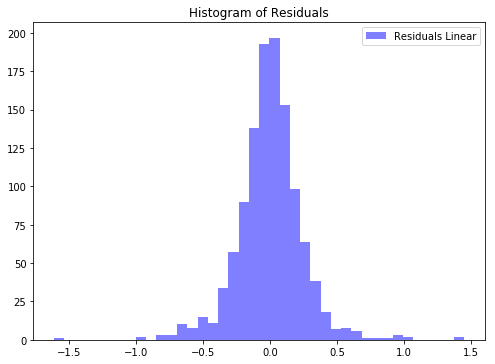

In [16]:
# 在训练集上查看模型预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(y_train - lr_y_predict_train, bins=40, label='Residuals Linear', color='b', alpha=.5)
ax.set_title('Histogram of Residuals')
ax.legend(loc='best')

残差分布和高斯分布比较匹配

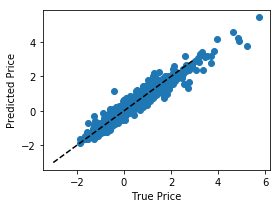

In [17]:
# 观察预测值与真值的散点图
plt.figure(figsize=(4, 3))
plt.scatter(y_train, lr_y_predict_train)
plt.plot([-3, 3], [-3, 3], '--k')
plt.axis('tight')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.tight_layout()

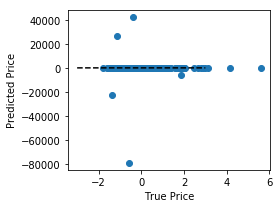

In [18]:
# 观察预测值与真值的散点图
plt.figure(figsize=(4, 3))
plt.scatter(y_test, lr_y_predict)
plt.plot([-3, 3], [-3, 3], '--k')
plt.axis('tight')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.tight_layout()

可以看出，在个别点上预测残差很大，效果很不理想。

In [19]:
# 线性模型，随机梯度下降优化模型参数
from sklearn.linear_model import SGDRegressor

# 使用默认配置初始化线
sgdr = SGDRegressor(max_iter=5000)

In [20]:
# 训练：参数估计
sgdr.fit(X_train, y_train)
sgdr.coef_

/Users/qi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.01227622,  0.07508311,  0.02516649, -0.00299467,  0.00600289,
        0.01460881,  0.01530947, -0.02286226, -0.05310027,  0.19910285,
        0.02852501,  0.03141013, -0.00604922, -0.04094279, -0.01432677,
        0.00393079,  0.07256503,  0.01428835, -0.05221302,  0.01563726,
       -0.05342768, -0.14560773, -0.23166489,  0.01860233,  0.12432073,
       -0.13236268, -0.01487865, -0.02401333, -0.00743616, -0.00174781,
       -0.0021808 ,  0.02610863, -0.03584853, -0.06073341, -0.10523798,
        0.03582054,  0.05363829,  0.02059618, -0.01368017,  0.00905734,
       -0.06696119, -0.29731211,  0.04427436,  0.20920816, -0.00458893,
        0.02033307,  0.01652722, -0.00666948,  0.01294595,  0.02588176,
       -0.02343325, -0.26377624,  0.00508834,  0.00536404,  0.15919636,
       -0.22415939,  0.04147974,  0.12141349,  0.02059618,  0.3562601 ,
        0.30685069,  0.00168403, -0.14123499, -0.02277004,  0.02381244,
       -0.00782006, -0.03520486, -0.12409537,  0.54579122,  0.33

In [21]:
# 使用SGDR自带的模型评估模块，并输出评估结果
# 测试集
print('the value of default measurement of SGDRegression on test is: ', sgdr.score(X_test, y_test))

# 训练集
print('The value of default measurement of SGDRegression on train is', sgdr.score(X_train, y_train))

the value of default measurement of SGDRegression on test is:  0.899968732868
The value of default measurement of SGDRegression on train is 0.93700324356


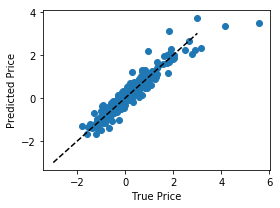

In [22]:
lr_y_predict = sgdr.predict(X_test)
# 观察预测值与真值的散点图
plt.figure(figsize=(4, 3))
plt.scatter(y_test, lr_y_predict)
plt.plot([-3, 3], [-3, 3], '--k')
plt.axis('tight')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.tight_layout()

## 正则化的线性回归（L2正则 --> 岭回归）

In [23]:
# 岭回归/L2正则
from sklearn.linear_model import RidgeCV
alphas = [0.01, 0.1, 1, 10, 20, 40, 80,100]

In [24]:
reg = RidgeCV(alphas=alphas, store_cv_values=True)
reg.fit(X_train, y_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10, 20, 40, 80, 100], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

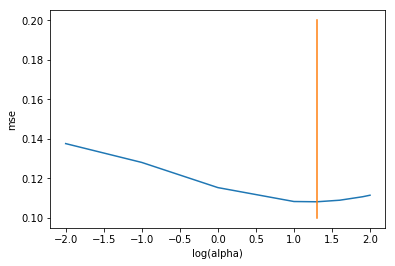

alpha is:  20.0


array([[  2.14497237e-02,   6.60044263e-02,   1.93938331e-02,
         -5.47839960e-03,  -2.33661891e-03,   8.04443338e-03,
          1.96187499e-02,   1.41205619e-03,   2.43380058e-02,
          1.57830373e-01,   2.67425238e-02,   5.06827915e-02,
         -2.13419450e-03,  -4.38060753e-02,  -3.80621115e-03,
          1.82766813e-03,   6.92067334e-02,   9.59498169e-03,
          5.44605998e-02,   1.12808798e-02,  -1.40922658e-02,
         -4.21581666e-02,   6.09844623e-03,   1.43469615e-02,
          4.27465590e-02,  -3.05410918e-02,  -6.83223730e-03,
          4.57835915e-03,  -1.02573308e-02,  -8.35455406e-03,
         -1.61289066e-03,   3.06842148e-02,  -5.56913655e-02,
         -4.32300231e-02,   2.12401974e-03,   4.33364680e-02,
          5.61270276e-02,   2.14158260e-02,  -7.11500954e-04,
         -4.63991057e-03,  -1.77559540e-02,  -3.56837980e-02,
          5.73378293e-02,   1.25011182e-02,  -2.86079260e-03,
          2.28111903e-02,   1.58842597e-02,  -8.76908247e-03,
        

In [25]:
mse_mean = np.mean(reg.cv_values_, axis=0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas), 1))
plt.plot(np.log10(reg.alpha_)*np.ones(3), [0.1, 0.15, 0.20])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print('alpha is: ', reg.alpha_)
reg.coef_

In [26]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果
print('The value of default measurement of RidgeRegression is', reg.score(X_test, y_test))

The value of default measurement of RidgeRegression is 0.909282377876


## 正则化的线性回归（L1正则 --> Lasso）

In [27]:
# Lasso/L1正则
from sklearn.linear_model import LassoCV

alphas = [0.01, 0.1, 1, 10, 100]

lasso = LassoCV(alphas=alphas)
lasso.fit(X_train, y_train)

/Users/qi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=[0.01, 0.1, 1, 10, 100], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

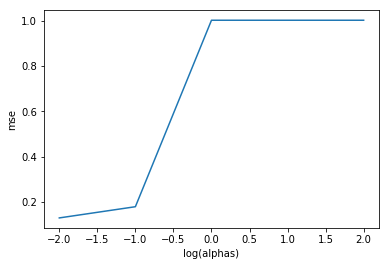

alpha is:  0.01


array([ 0.02452591,  0.04802438,  0.00913969, -0.00100968, -0.01429718,
        0.        ,  0.        ,  0.        ,  0.        ,  0.12719   ,
        0.02110642,  0.03902017,  0.0016329 , -0.00572803,  0.        ,
       -0.        ,  0.05402164, -0.        ,  0.09776698, -0.        ,
       -0.        , -0.        ,  0.        ,  0.01490556,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.00239768,
        0.        ,  0.01816272, -0.03788667, -0.05066709,  0.02761833,
        0.04093829,  0.04448334,  0.04359429,  0.01169637,  0.        ,
        0.        ,  0.        ,  0.01525044,  0.        ,  0.        ,
        0.01556615,  0.01592738, -0.        ,  0.00479801,  0.02979912,
       -0.        , -0.        , -0.00329419,  0.00548192,  0.10480596,
        0.        ,  0.        ,  0.        ,  0.00724558,  0.0112219 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.0002856 ,
       -0.        ,  0.08106782,  0.0776975 ,  0.17640661,  0.  

In [28]:
mses = np.mean(lasso.mse_path_, axis=1)
plt.plot(np.log10(lasso.alphas_), mses)
plt.xlabel('log(alphas)')
plt.ylabel('mse')
plt.show()

print('alpha is: ', lasso.alpha_)
lasso.coef_

对比岭回归、最小二乘回归，可以明显看到Lasso回归能够使回归系数矩阵稀疏化的特点。

In [29]:
# 在本任务中，最佳alpha为参数grid的最左端，继续检查比当前更小的alpha是否会更好

In [30]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果
print('The value of default measurement of Lasso Regression on test is', lasso.score(X_test, y_test))
print('The value of default measurement of Lasso Regression on train is', lasso.score(X_train, y_train))

The value of default measurement of Lasso Regression on test is 0.891042777313
The value of default measurement of Lasso Regression on train is 0.895712017952


### 模型选择

In [31]:
# 综合三者在训练集和验证集上评估结果, 可以看出Lasso回归模型表现更好. 试用Lasso回归对测试数据集进行预测.
data_test = pd.read_csv(dpath + "AmesHouse_FE_test.csv")

In [32]:
X_predict = data_test.drop(['Id'], axis=1)

In [33]:
y_predict = lasso.predict(X_predict)

In [34]:
y_predict = ss_y.inverse_transform(y_predict, copy=None)

In [35]:
result = pd.DataFrame({'Id':data_test['Id'], 'SalePricePredict':y_predict})

In [36]:
result.to_csv('AmesHousePricesPredictResult.csv',index=False)